<a href="https://colab.research.google.com/github/bala-codes/BENIGN-VS-MALIGNANT-URL-ML-CLASSIFIER/blob/master/codes/Part%201%20of%20URL%20Classifier%20Training%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#  HERE I AM USING MY OWN CSV FILE, IF YOU HAVE YOU OWN FILE (.CSV) FORMAT , GIVE THE BELOW DF INPUT AS YOUR FILE INPUT.

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/spam real url classifier.csv') # If you have your input file as .csv format
df = pd.DataFrame(df)
df.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [ ]:
df.shape

(420464, 2)

In [ ]:
df.groupby("label").describe()

url                                      
        count  unique                      top freq
label                                              
bad     75643   66448  103.234.36.75/rd927.exe   27
good   344821  344800         tricity.wsu.edu/    2

# IF YOU DON'T SEE ANY VERTICAL BAR IN THE BELOW GRAPH, THEN YOU DON'T HAVE ANY MISSING VALUES IN ANY OF THE FIELDS

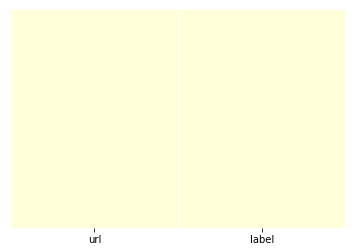

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

# HERE WE DROP ALL THE DUPLICATES ROWS IF EXISTS IN THE DATAFRAME

In [ ]:
df.drop_duplicates(inplace = True)
df.dropna(inplace=True)

In [ ]:
df = pd.DataFrame(df)


In [ ]:
def word_count(sentence):
  return len(sentence.split())

df['word count'] = df['url'].apply(word_count)
df.tail(10)

,url,label,word count
420453,stefanocardone.com/wp-includes/SimplePie/HTTP/...,bad,1
420455,shapingsoftware.com/2009/02/09/architectural-s...,bad,1
420456,free.ulohapp.info/?br_fl=2872&amp;tuif=5539&am...,bad,1
420457,free.ulohapp.info/?oq=CEh3h_PskJLFZaQWwjEKBegU...,bad,1
420458,mol.com-ho.me/cv_itworx.doc,bad,1
420459,23.227.196.215/,bad,1
420460,apple-checker.org/,bad,1
420461,apple-iclods.org/,bad,1
420462,apple-uptoday.org/,bad,1
420463,apple-search.info,bad,1


In [ ]:
import matplotlib.pyplot as plt
x = df['word count'][df.label == 'bad']
y = df['word count'][df.label == 'good']
x.head()

0    1
1    1
2    1
3    1
4    1
Name: word count, dtype: int64

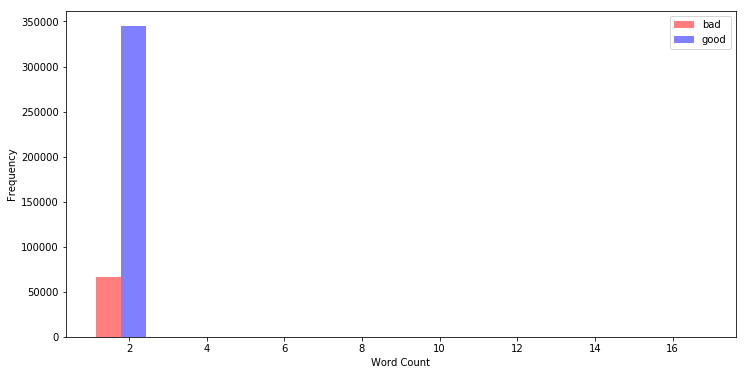

In [ ]:
# Plotting the word count distribution for both FAKE and REAL news
plt.figure(figsize = (12,6))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g =plt.hist([x, y],color = ['r','b'], alpha = 0.5,label = ['bad','good'])
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
df.head()

,url,label,word count
0,diaryofagameaddict.com,bad,1
1,espdesign.com.au,bad,1
2,iamagameaddict.com,bad,1
3,kalantzis.net,bad,1
4,slightlyoffcenter.net,bad,1


In [ ]:
def text_cleaner(text):
  s = re.sub(r"['!#$%&\'()*+,-./:;<=>?@//\\^_`{|}~']",' ',text)
  return s

df['url_cleaned'] = df['url'].apply(text_cleaner)
df.to_csv("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/urlcleaned.csv")  # SAVE THE FINAL CLEANED COPY IF YOU WANT 


In [ ]:
df['label_enc'] = df['label'].replace(to_replace = ['bad', 'good'], value = [0,1])
df = pd.DataFrame(df)
df.tail()

,url,label,word count,url_cleaned,label_enc
420459,23.227.196.215/,bad,1,23 227 196 215,0
420460,apple-checker.org/,bad,1,apple checker org,0
420461,apple-iclods.org/,bad,1,apple iclods org,0
420462,apple-uptoday.org/,bad,1,apple uptoday org,0
420463,apple-search.info,bad,1,apple search info,0


In [ ]:
# Displaying the most common words in the dataset

# Changed from "url" - > "url_cleaned"
import collections
#from counter import Counter

df['url_cleaned'] = df['url_cleaned'].astype(str)
all_words = []

for line in list(df['url_cleaned']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('com', 307945),
 ('html', 60068),
 ('org', 38551),
 ('php', 32904),
 ('htm', 23320),
 ('en', 21536),
 ('wiki', 17089),
 ('index', 16585),
 ('net', 16570),
 ('ca', 13922)]

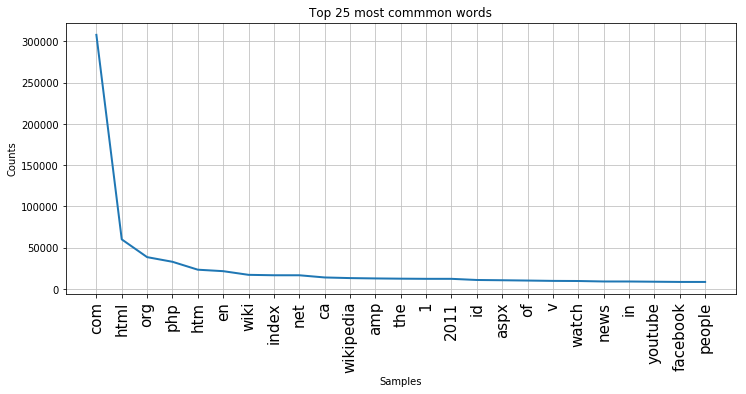

In [ ]:
#Plotting the word frequency distribution of first couple of words

plt.figure(figsize=(12,5))
plt.title('Top 25 most commmon words')
plt.xticks(fontsize=15,rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)


In [ ]:
#!pip install WordCloud

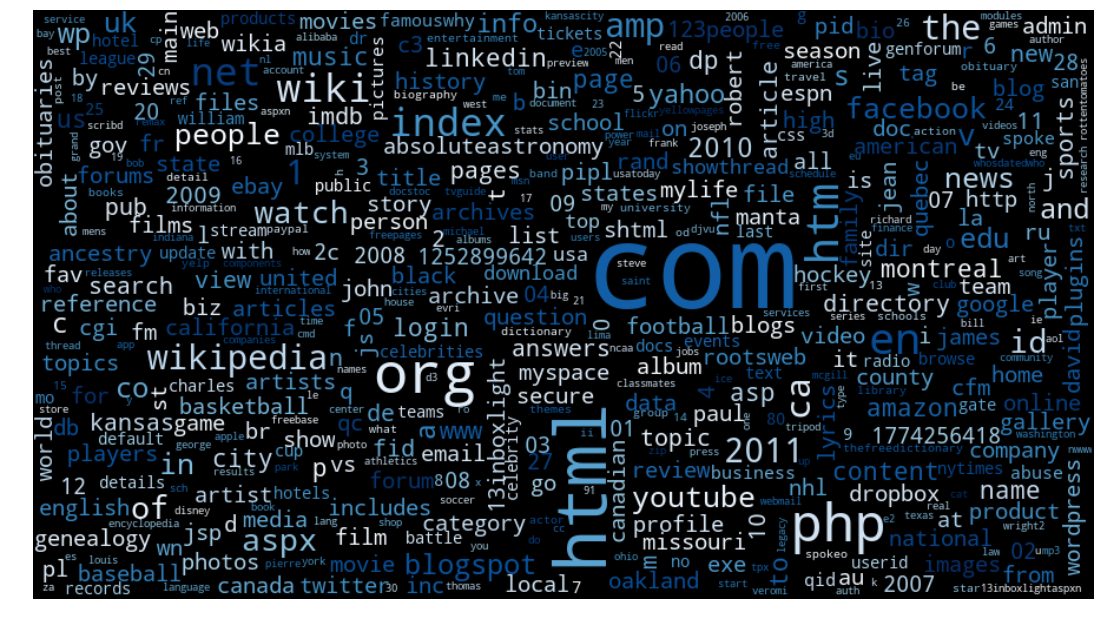

In [ ]:
# Creating a word Cloud
from wordcloud import WordCloud
import collections

all_words = []

for line in list(df['url_cleaned']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df = pd.DataFrame(df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['url_cleaned'],df['label_enc'],test_size=0.20,random_state=87,shuffle=True,stratify=df['label'].values) # rs = 77(88)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(328998,)
(328998,)
(82250,)
(82250,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words = "english")
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [ ]:
print(count_train)
print('\n')
print("feature_names",count_vectorizer.get_feature_names()[:10])

  (0, 210200)	1
  (0, 185788)	1
  (0, 238977)	1
  (1, 167281)	1
  (1, 125349)	1
  (1, 235893)	1
  (1, 82843)	1
  (1, 82836)	1
  (1, 82888)	1
  (1, 177551)	1
  (2, 125349)	1
  (2, 140746)	1
  (3, 172819)	1
  (3, 228315)	1
  (3, 265558)	1
  (3, 154140)	1
  (3, 283654)	1
  (4, 125349)	1
  (4, 177551)	1
  (4, 303529)	1
  (4, 303614)	1
  (4, 137110)	1
  (4, 201593)	1
  (5, 238977)	1
  (5, 93298)	1
  :	:
  (328995, 26912)	1
  (328995, 273204)	1
  (328995, 261572)	1
  (328995, 245624)	1
  (328995, 209637)	1
  (328995, 317686)	1
  (328996, 125349)	1
  (328996, 177556)	1
  (328996, 106376)	1
  (328996, 167162)	1
  (328996, 39068)	1
  (328996, 281256)	1
  (328996, 195583)	1
  (328996, 269602)	1
  (328996, 197265)	1
  (328996, 119826)	1
  (328996, 183366)	1
  (328996, 280155)	1
  (328997, 125349)	1
  (328997, 200449)	1
  (328997, 127115)	1
  (328997, 260900)	1
  (328997, 24809)	1
  (328997, 200451)	1
  (328997, 290790)	1


feature_names ['00', '000', '0000', '00000', '000000', '00000000', '000000

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)
print(tfidf_train)
#this command gives importance for each and every word
print(tfidf_train[0:3])

  (0, 238976)	0.2684277306190007
  (0, 210199)	0.6246553465559067
  (0, 185787)	0.7333159288150322
  (1, 235892)	0.3114530714800602
  (1, 177550)	0.16990399631129047
  (1, 167280)	0.5304480382738218
  (1, 82888)	0.39527830088698035
  (1, 82843)	0.5706357072230427
  (1, 82836)	0.33299316732405104
  (2, 140745)	1.0
  (3, 283653)	0.3713302276087936
  (3, 265557)	0.4122956975775979
  (3, 228314)	0.22701053074306918
  (3, 172818)	0.6762423144496139
  (3, 154139)	0.4281222616292955
  (4, 303613)	0.5706221671289495
  (4, 303528)	0.35384198072822504
  (4, 201592)	0.43490293596268176
  (4, 177550)	0.1855693232392911
  (4, 137109)	0.5706221671289495
  (5, 238976)	0.15762375263388526
  (5, 183114)	0.34085122863502254
  (5, 179319)	0.6087068629278297
  (5, 177555)	0.13723932976011066
  (5, 147765)	0.3147895629777514
  :	:
  (328995, 261571)	0.35282418457462916
  (328995, 245623)	0.34619007861017675
  (328995, 209636)	0.3800865412451906
  (328995, 177555)	0.10673680416799641
  (328995, 171840)	0.34

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



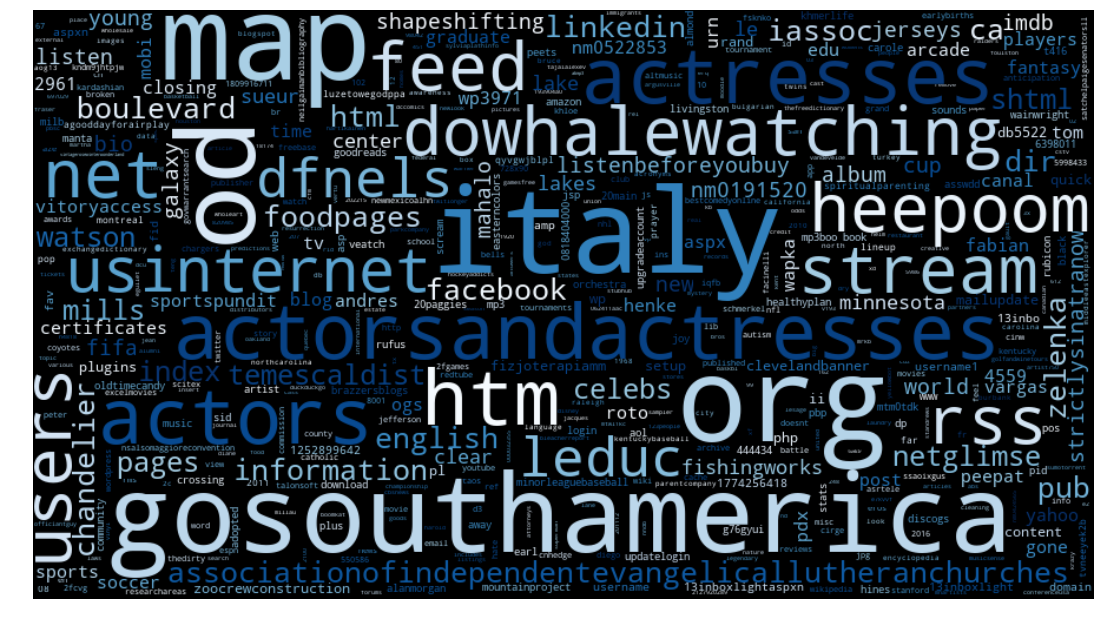

In [ ]:

all_words = []
print(tfidf_vectorizer.vocabulary_)
for k,v in (tfidf_vectorizer.vocabulary_).items():
  all_words.append(k)


wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
len(tfidf_vectorizer.vocabulary_)

323029

# In the next code , kindly check the alpha values for which you get more accuracy and provide that accuracy in the hyperparameter section of our Naive Bayes model

# NAIVE BAYES CLASSIFIER

In [ ]:
#USING NAIVE BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB(alpha=0.1)

nb_classifier.fit(tfidf_train,y_train)
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 97.799 %
[[11690  1600]
 [  210 68750]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):

    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0
Score:  0.9761215805471125

Alpha:  0.1


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.9779939209726444

Alpha:  0.2
Score:  0.9773495440729483

Alpha:  0.30000000000000004
Score:  0.976

Alpha:  0.4
Score:  0.9746504559270517

Alpha:  0.5
Score:  0.9731550151975684

Alpha:  0.6000000000000001
Score:  0.9710030395136778

Alpha:  0.7000000000000001
Score:  0.9682674772036474

Alpha:  0.8
Score:  0.9668449848024316

Alpha:  0.9
Score:  0.9649726443768997



# Bernoulli's Bayes

In [ ]:
#USING Bernoulli BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bb_classifier = BernoulliNB(alpha=0.0)

bb_classifier.fit(tfidf_train,y_train)
pred = bb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 97.612 %
[[11672  1618]
 [  346 68614]]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):

    bb_classifier = BernoulliNB(alpha=alpha)
    bb_classifier.fit(tfidf_train, y_train)
    pred = bb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.9761215805471125

Alpha:  0.1


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.9773617021276596

Alpha:  0.2
Score:  0.9762066869300912

Alpha:  0.30000000000000004
Score:  0.9731428571428572

Alpha:  0.4
Score:  0.9695197568389058

Alpha:  0.5
Score:  0.9657993920972644

Alpha:  0.6000000000000001
Score:  0.9632826747720364

Alpha:  0.7000000000000001
Score:  0.9599148936170213

Alpha:  0.8
Score:  0.9566565349544073

Alpha:  0.9
Score:  0.9527173252279635



# PASSIVE AGGRESSIVE CLASSIFIER

In [ ]:
#USING PASSIVE AGGRESSIVE MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

PA_classifier = PassiveAggressiveClassifier(max_iter=350)

PA_classifier.fit(tfidf_train,y_train)
pred = PA_classifier.predict(tfidf_test)


# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 97.83 %
[[11967  1323]
 [  462 68498]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]

# Define train_and_predict()
def train_and_predict(alpha):

    PA_classifier = PassiveAggressiveClassifier(max_iter=alpha)
    PA_classifier.fit(tfidf_train, y_train)
    pred = PA_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  50
Score:  0.9784924012158055

Alpha:  100
Score:  0.9782492401215805

Alpha:  150
Score:  0.9778966565349544

Alpha:  200
Score:  0.9784072948328267

Alpha:  250
Score:  0.9785775075987841

Alpha:  300
Score:  0.978468085106383

Alpha:  350
Score:  0.9783951367781155

Alpha:  400
Score:  0.9781033434650456

Alpha:  450
Score:  0.978322188449848

Alpha:  500
Score:  0.9783951367781155

Alpha:  600
Score:  0.9784559270516717

Alpha:  700
Score:  0.978322188449848

Alpha:  800
Score:  0.978468085106383

Alpha:  900
Score:  0.9782370820668693

Alpha:  1000
Score:  0.9784559270516717



# SGD CLASSIFIER

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import SGDClassifier
from sklearn import metrics

SGD_classifier = SGDClassifier()

SGD_classifier.fit(tfidf_train,y_train)
pred = SGD_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 92.738 %
[[ 7597  5693]
 [  280 68680]]


# SUPPORT VECTOR MACHINES

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.svm import LinearSVC
from sklearn import metrics

SVC_classifier = LinearSVC()

SVC_classifier.fit(tfidf_train,y_train)
pred = SVC_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 97.784 %
[[11880  1410]
 [  413 68547]]


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(C=1000)

logreg_classifier.fit(tfidf_train,y_train)
pred = logreg_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score from TFIDF Vectorizer 97.79 %
[[11915  1375]
 [  443 68517]]


In [ ]:
import numpy as np

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Define train_and_predict()
def train_and_predict(C):

    logreg_classifier = LogisticRegression(C=C)
    logreg_classifier.fit(tfidf_train, y_train)
    pred = logreg_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()

C value:  0.001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.8384194528875379

C value:  0.01
Score:  0.8778723404255319

C value:  0.1
Score:  0.9333617021276596

C value:  1
Score:  0.9632826747720364

C value:  10
Score:  0.9755501519756838

C value:  100
Score:  0.9770091185410335

C value:  1000
Score:  0.9778966565349544



# Logistic Regression CV

In [ ]:
'''%%time
from sklearn.linear_model import LogisticRegressionCV

logregcv_classifier = LogisticRegressionCV(Cs=100,solver='saga')

logregcv_classifier.fit(tfidf_train,y_train)
pred = logregcv_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['bad','good'])
print(cm)'''

'%%time\nfrom sklearn.linear_model import LogisticRegressionCV\n\nlogregcv_classifier = LogisticRegressionCV(Cs=100,solver=\'saga\')\n\nlogregcv_classifier.fit(tfidf_train,y_train)\npred = logregcv_classifier.predict(tfidf_test)\n\n# Calculate the accuracy score: score\nscore = metrics.accuracy_score(y_test,pred)\nprint("Score from TFIDF Vectorizer", round(score*100,3) ,"%")\n\n# Calculate the confusion matrix: cm\ncm = metrics.confusion_matrix(y_test,pred, labels=[\'bad\',\'good\'])\nprint(cm)'

In [ ]:
'''import numpy as np

C = [1, 10, 50, 75, 100]

# Define train_and_predict()
def train_and_predict(C):

    logregcv_classifier = LogisticRegressionCV(Cs=C)
    logregcv_classifier.fit(tfidf_train, y_train)
    pred = logregcv_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()'''

"import numpy as np\n\nC = [1, 10, 50, 75, 100]\n\n# Define train_and_predict()\ndef train_and_predict(C):\n\n    logregcv_classifier = LogisticRegressionCV(Cs=C)\n    logregcv_classifier.fit(tfidf_train, y_train)\n    pred = logregcv_classifier.predict(tfidf_test)\n    score = metrics.accuracy_score(y_test, pred)\n    return score\n\n# Iterate over the alphas and print the corresponding score\nfor c in C:\n    print('C value: ', c)\n    print('Score: ', train_and_predict(c))\n    print()"

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(tfidf_train,y_train)
pred = knn_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=[0,1])
print(cm)

Score from TFIDF Vectorizer 96.243 %
[[10546  2744]
 [  346 68614]]
CPU times: user 6min 53s, sys: 1.04 s, total: 6min 54s
Wall time: 6min 55s


In [1]:
'''import numpy as np

neighbor = [2, 5, 8, 10, 15, 20, 30, 50]

# Define train_and_predict()
def train_and_predict(neighbor):

    knn_classifier = KNeighborsClassifier(n_neighbors=neighbor)
    knn_classifier.fit(tfidf_train, y_train)
    pred = knn_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for nei in neighbor:
    print('C value: ', nei)
    print('Score: ', train_and_predict(nei))
    print()'''

"import numpy as np\n\nneighbor = [2, 5, 8, 10, 15, 20, 30, 50]\n\n# Define train_and_predict()\ndef train_and_predict(neighbor):\n\n    knn_classifier = KNeighborsClassifier(n_neighbors=neighbor)\n    knn_classifier.fit(tfidf_train, y_train)\n    pred = knn_classifier.predict(tfidf_test)\n    score = metrics.accuracy_score(y_test, pred)\n    return score\n\n# Iterate over the alphas and print the corresponding score\nfor nei in neighbor:\n    print('C value: ', nei)\n    print('Score: ', train_and_predict(nei))\n    print()"

In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_
print("class_labels" , class_labels)
print(" ")
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()
print("feature_names" , feature_names)
print(" ")
print(type(feature_names))
  

class_labels [0 1]
 


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])
print(" ")

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


0 [(-15.658163226916761, '000000000'), (-15.658163226916761, '0000000000'), (-15.658163226916761, '000000004c1aee0e'), (-15.658163226916761, '000000022222222222222222222222222222mnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn2'), (-15.658163226916761, '00000008'), (-15.658163226916761, '00000050'), (-15.658163226916761, '0000011b'), (-15.658163226916761, '000001992819278372818381291'), (-15.658163226916761, '0000037kz4xjred5scxsmbnj3zr24dyy4qvqo0rqa1hu7dievqfkb1ub7yw5gcl8nv96nafvowb4tuxbfe90316cis'), (-15.658163226916761, '000007897516091143995905315221'), (-15.658163226916761, '000013'), (-15.658163226916761, '000022'), (-15.658163226916761, '00005ik'), (-15.658163226916761, '00009gc7fiu64'), (-15.658163226916761, '00011007195'), (-15.658163226916761, '00053c'), (-15.658163226916761, '0009e636'), (-15.658163226916761, '000a'), (-15.658163226916761, '000a4a51161c9ae8ae4ee73b4fd13b2a483dde1df6d6a438784cdf6733b73763'), (-15.658163226916761, '000ded60ea040d013384ba6eac24fdf1')]
 
1 [(-6.1713092648

# Trying out ensemble model for URL classification

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
%%time

best_params = {'C': 1000}
logreg_classifier = LogisticRegression(**best_params, class_weight='balanced')
logreg_classifier.fit(tfidf_train,y_train)
print("logreg classifier ran")


best_params = {'alpha': 0.1} #0.001
nb_classifier = MultinomialNB(**best_params)
nb_classifier.fit(tfidf_train,y_train)
print("naive bayes classifier ran")


best_params = {'alpha': 0.1} #0.001
bb_classifier = BernoulliNB(**best_params)
bb_classifier.fit(tfidf_train,y_train)
print("bernoulli classifier ran")


svc_classifier = LinearSVC(class_weight='balanced')
svc_classifier.fit(tfidf_train,y_train)
print("svc classifier ran")


best_params = {'max_iter': 350}
pac_classifier = PassiveAggressiveClassifier(**best_params)
pac_classifier.fit(tfidf_train,y_train)
print("pac classifier ran ")


sgd_tf = SGDClassifier(loss='hinge',class_weight='balanced')
clf = sgd_tf.fit(tfidf_train,y_train)
calibrator_classifier = CalibratedClassifierCV(clf, cv='prefit')
calibrator_classifier.fit(tfidf_train, y_train)
print("sgd classifier ran")

best_params = {'n_neighbors': 3}
knn_classifier = KNeighborsClassifier(**best_params)
knn_classifier.fit(tfidf_train,y_train)

print("all models ran")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logreg classifier ran
naive bayes classifier ran
bernoulli classifier ran
svc classifier ran
pac classifier ran 
sgd classifier ran
all models ran
CPU times: user 24.7 s, sys: 15 s, total: 39.7 s
Wall time: 22.1 s


In [ ]:
import pickle

with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/logreg_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logreg_classifier), fout)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/nb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, nb_classifier), fout)

with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/bb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, bb_classifier), fout)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/svc_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, svc_classifier), fout)

with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/pac_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, pac_classifier), fout)  
 
with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/calibrator_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, calibrator_classifier), fout)  

with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/knn_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, knn_classifier), fout)

print("All models loaded as pickle files successfully")

All models loaded as pickle files successfully


In [ ]:
from scipy.stats.mstats import mode
import numpy as np

def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = svc_classifier._predict_proba_lr(x)
  pred4 = pac_classifier._predict_proba_lr(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = knn_classifier.predict_proba(x)
  pred7 = bb_classifier.predict_proba(x)


  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6, pred7], axis=0)
  print("Test_Pred_Prob",test_pred_prob)
  pred = np.argmax(test_pred_prob, axis=1)
  return pred

In [ ]:
pred = []
pred = ensemble(tfidf_test)
pred = np.array(pred)

#y_test = y_test.replace(to_replace = ['bad', 'good'], value = [0,1])

Test_Pred_Prob [[0.94775446 0.05224554]
 [0.09715648 0.90284352]
 [0.12686958 0.87313042]
 ...
 [0.03655881 0.96344119]
 [0.4826152  0.5173848 ]
 [0.05108732 0.94891268]]


# Our final Ensemble Score

In [ ]:
print(type(y_test))
score = metrics.accuracy_score(y_test,pred)
print("Score from ENSEMBLE", round(score*100,3) ,"%")

<class 'pandas.core.series.Series'>
Score from ENSEMBLE 97.996 %


In [ ]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

[[11997  1293]
 [  355 68605]]


#  IF YOU WANT TO CATEGORIZE LOTS OF NEWS COLUMNS, JUST GIVE THE INPUT AS A DATAFRAME LIKE THE ABOVE 

# OR 

# EITHER GO TO PART 2 OF OUR CODE FILES FOR CHECK PREDICTION FOR SINGLE INPUT